## TRABALHO PRÁTICO 1

Acumular as leituras por dias e depois agrupar por trimestre.


1 - Coletas realizadas separadas por trimestre:

Trimestre	Volume acumulado
1º		2858.4
2º		2380.8
3º		2249.2
4º		3474.8

2 - Gráficos do período :



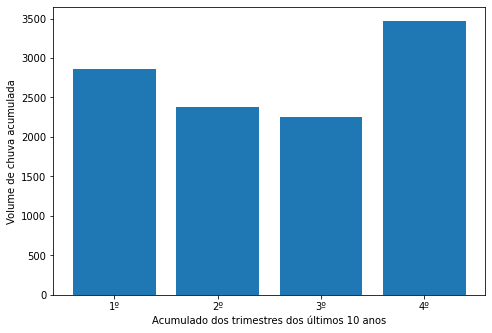


3 - Relatório sobre índice de coletas realizadas e previstas no trimestre:

Trimestre	Coletas realizadas	Coletas previstas	Índice de coletas
1º			12890.0			21672.0			59.48			%
2º			12634.0			21840.0			57.85			%
3º			12347.0			22080.0			55.92			%
4º			11863.0			22080.0			53.73			%


In [39]:

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

caminho = './'
dataset_orig = 'dataset_reg_chuva_santa_maria_2011_2020_2.csv'

# caminho para o dataset original
dataset_original_coletas = pd.read_csv(caminho + dataset_orig, sep = ';')

# apaga as linhas com valores null na coluna CHUVA
dataset_original_coletas['CHUVA'].dropna(inplace = True)

# dataset original
dataset_original_coletas.sort_values(by = ['DT_MEDICAO', 'HR_MEDICAO'], inplace = True)
# reseta indice depois de ordenar linhas
dataset_original_coletas.reset_index(drop = True, inplace = True)

# pegando primeira e última data do dataset
todas_datas = dataset_original_coletas['DT_MEDICAO']
data_inicial = todas_datas[0]
data_final = todas_datas[len(dataset_original_coletas) - 1]

# convertendo primeira e última data para formato datetime
data_inicial_date = datetime.strptime(data_inicial, '%Y-%m-%d')
data_final_date = datetime.strptime(data_final, '%Y-%m-%d')

# vetor de datas com o período compreendido
dif_data_final_data_inicial = data_final_date - data_inicial_date
datas_periodo = pd.date_range(data_inicial_date, periods = (dif_data_final_data_inicial.days + 1))

# criando dataframe com as datas do período 
leituras = np.zeros(len(datas_periodo), dtype=int)
# criando estrutura dicionario com conjunto de dias e leituras
dt_periodo_previsto_coletas_dias = pd.DataFrame({'DT_MEDICAO' : datas_periodo, 'CHUVA' : leituras})

for linha, coluna in dataset_original_coletas.iterrows():
    dataset_original_coletas.at[linha, 'DT_MEDICAO'] = pd.Timestamp(coluna['DT_MEDICAO'])
    # substitui a virgula como divisor de float pelo ponto
    dataset_original_coletas.at[linha, 'CHUVA'] = float(str(coluna['CHUVA']).replace(',', '.'))

# 1 - Uma tabela com uma coluna contendo todos os trimestres de 2010-2020, a precipitação acumulada no respectivo trimestre;

dataset_original_coletas_trimestre = dataset_original_coletas.groupby(pd.Grouper(key='DT_MEDICAO', freq='Q'))['CHUVA'].agg(['count' , 'sum'])
print("\n1 - Coletas realizadas separadas por trimestre:\n")

print("Trimestre", "Volume acumulado", sep = '\t')

leituras_trimestres = np.zeros(4, dtype=float)
trimestres = ['1º', '2º', '3º', '4º']
indice = 0
for linha, coluna in dataset_original_coletas_trimestre.iterrows():       
    t = int(int(linha.strftime("%m")) / 3)
    leituras_trimestres[t-1] += coluna['sum']

for i in leituras_trimestres:
    print(trimestres[indice] , round(i, 2), sep = '\t\t')
    indice += 1

#  2. Um gráfico com a evolução da precipitação que contenha todo o trimestre

print("\n2 - Gráficos do período :\n")

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(trimestres, leituras_trimestres)
plt.xlabel("Acumulado dos trimestres dos últimos 10 anos")
plt.ylabel("Volume de chuva acumulada")
plt.show()

# 3 - As observações sobre o número de medidas perdidas (dados faltantes) nos trimestres de 2010-2020.
  
dt_previsto_coletas_trimestre = dt_periodo_previsto_coletas_dias.groupby(pd.Grouper(key='DT_MEDICAO', freq='Q'))['CHUVA'].agg(['count']) 


coletas_realizadas = np.zeros(4, dtype=float)
coletas_previstas = np.zeros(4, dtype=float)

print("\n3 - Relatório sobre índice de coletas realizadas e previstas no trimestre:\n")
print("Trimestre", "Coletas realizadas", "Coletas previstas", "Índice de coletas", sep = '\t')
for linha, coluna in dataset_original_coletas_trimestre.iterrows():
    t = int(int(linha.strftime("%m")) / 3)
    coletas_realizadas[t-1] += coluna['count']
    coletas_previstas[t-1] += dt_previsto_coletas_trimestre.at[linha, 'count'] * 24
    

indice = 0

for coleta_realizada in coletas_realizadas:
    print(trimestres[indice] , round(coleta_realizada, 2), coletas_previstas[indice], round((coleta_realizada / coletas_previstas[indice]) * 100, 2),"%", sep = '\t\t\t')
    indice += 1
 
